# Estudios de Informática, Multimedia y Telecomunicaciones

Minería de datos: PRA2 - Modelado de un juego de datos

Autor: Santiago Domínguez Collado

Abril 2020

* 1 Introducción
    * 1.1 Presentación
    * 1.2 Competencias
    * 1.3 Objetivos
    * 1.4 Descripción de la PEC a realizar

    * 1.5 Recursos Básicos

    * 1.6 Criterios de valoración

    * 1.7 Formato y fecha de entrega
    
    * 1.8 Nota: Propiedad intelectual

* 2 Enunciado

* 3 Rúbrica

## 1 Introducción

### 1.1 Presentación

Esta práctica cubre de forma transversal la asignatura.

Las Prácticas 1 y 2 de la asignatura se plantean de una forma conjunta de modo que la Práctica 2 será continuación de la 1.

El objetivo global de las dos prácticas consiste en seleccionar uno o varios juegos de datos, realizar las tareas de preparación y análisis exploratorio con el objetivo de disponer de datos listos para aplicar algoritmos de clustering, asociación y clasificación.

### 1.2 Competencias

Las competencias que se trabajan en esta prueba son:

* Uso y aplicación de las TIC en el ámbito académico y profesional.

* Capacidad para innovar y generar nuevas ideas.
* Capacidad para evaluar soluciones tecnológicas y elaborar propuestas de proyectos teniendo en cuenta los recursos, las alternativas disponibles y las condiciones de mercado.

* Conocer las tecnologías de comunicaciones actuales y emergentes así como saberlas aplicar convenientemente para diseñar y desarrollar soluciones basadas en sistemas y tecnologías de la información.

* Aplicación de las técnicas específicas de ingeniería del software en las diferentes etapas del ciclo de vida de un proyecto.

* Capacidad para aplicar las técnicas específicas de tratamiento, almacenamiento y administración de datos.

* Capacidad para proponer y evaluar diferentes alternativas tecnológicas para resolver un problema concreto.

### 1.3 Objetivos

La correcta asimilación de todos los aspectos trabajados durante el semestre.

 

En esta práctica abordamos un caso real de minería de datos donde tenemos que poner en juego todos los conceptos trabajados. Hay que trabajar todo el ciclo de vida del proyecto. Desde el objetivo del proyecto hasta la implementación del conocimiento encontrado pasando por la preparación, limpieza de los datos, conocimiento de los datos, generación del modelo, interpretación y evaluación.

### 1.4 Descripción de la PEC a realizar

 
### 1.5 Recursos Básicos

Material docente proporcionado por la UOC.

 
### 1.6 Criterios de valoración

Ejercicios prácticos

Para todas las PEC es necesario documentar en cada apartado del ejercicio práctico que se ha hecho y como se ha hecho.

 
### 1.7 Formato y fecha de entrega
 
El formato de entrega es: usernameestudiante-PECn.html/doc/docx/odt/pdf/rmd

 

Fecha de entrega: 17/06/2020

 

Se debe entregar la PEC en el buzón de entregas del aula

### 1.8 Nota: Propiedad intelectual

A menudo es inevitable, al producir una obra multimedia, hacer uso de recursos creados por terceras personas. Es por lo tanto comprensible hacerlo en el marco de una práctica de los estudios de Informática, Multimedia y Telecomunicación de la UOC, siempre y cuando esto se documente claramente y no suponga plagio en la práctica.

Por lo tanto, al presentar una práctica que haga uso de recursos ajenos, se debe presentar junto con ella un documento en que se detallen todos ellos, especificando el nombre de cada recurso, su autor, el lugar donde se obtuvo y su estatus legal: si la obra está protegida por el copyright o se acoge a alguna otra licencia de uso (Creative Commons, licencia GNU, GPL …). El estudiante deberá asegurarse de que la licencia no impide específicamente su uso en el marco de la práctica. En caso de no encontrar la información correspondiente tendrá que asumir que la obra está protegida por copyright.

Deberéis, además, adjuntar los ficheros originales cuando las obras utilizadas sean digitales, y su código fuente si corresponde.

## 2 Enunciado

Como continuación del estudio iniciado en la práctica 1, procedemos en esta práctica 2 a aplicar modelos analíticos sobre el juego de datos seleccionado y preparado en la práctica anterior.

De este modo se pide al estudiante que complete los siguientes pasos:

* 1. Aplicar un modelo de generación de reglas a partir de árboles de decisión.

* 2. Aplicar un modelo no supervisado y basado en el concepto de distancia, sobre el juego de datos.

* 3. Aplica de nuevo el modelo anterior, pero usando una métrica distinta y compara los resultados.

* 4. Aplicar un modelo supervisado sobre el juego de datos sin haber aplicado previamente PCA/SVD.

* 5. Aplicar un modelo supervisado sobre el juego de datos habiendo aplicado previamente PCA/SVD.

* 6. ¿Ha habido mejora en capacidad predictiva, tras aplicar PCA/SVD? ¿A qué crees que es debido?.

#### 2.1 Código de la parte 1.
#### Breast Cancer Wisconsin Dataset 

In [2]:
import pandas as pd
df = pd.read_csv('wisconsin-cancer-dataset.csv',header=None,names=['PatientID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Output'])
df = df[df['Bare Nuclei'] != '?']
df=df.astype('int64')
df.iloc[:,10].replace(2, 0,inplace=True)
df.iloc[:,10].replace(4, 1,inplace=True)
df.dropna(inplace=True)
df = df.drop('PatientID', 1)
df['Uniformity of Cell Shape']=df['Uniformity of Cell Shape'].apply(lambda x: 5 if x==6 else(6 if x==8 or x==7 else(7 if x>8 else x)))
df['Marginal Adhesion']=df['Marginal Adhesion'].apply(lambda x: 4 if x>4 and x<7 else(5 if x==8 or x==7 else(6 if x==9 else(7 if x==10 else x))))
df['Bland Chromatin']=df['Bland Chromatin'].apply(lambda x: 5 if x>4 and x<8 else(6 if x>7 else x))
column_maxes = df.iloc[:,0:9].max()
df_max = column_maxes.max()
normalized_df = df.iloc[:,0:9] / df_max
normalized_df['Output']=df['Output']
col_list= list(normalized_df)
col_list.remove('Output')
normalized_df['Suma'] = normalized_df[col_list].sum(axis=1)
normalized_df=normalized_df[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Suma','Output']]
column_maxes = normalized_df.iloc[:,0:10].max()
df_max = column_maxes.max()
normalized_df = normalized_df.iloc[:,0:10] / df_max
normalized_df['Output']=df['Output']
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(normalized_df.iloc[:,0:10])
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x_std)
PCA_components = pd.DataFrame(principalComponents)

#### Market Basket Optimization

In [70]:
df2 = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
import numpy as np
transactions = []
for i in range(0, 7501):
    transactions.append([str(df2.values[i,j]) for j in range(0, 20)])
transactions = np.array(transactions)
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(transactions)
data = pd.DataFrame(data, columns = te.columns_)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,oatmeal,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar
0,False,True,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1297,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1298,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**PREGUNTA 1**: Aplicar un modelo de generación de reglas.

In [52]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,honey,hot dogs,ketchup,light cream,light mayo,low fat yogurt,magazines,mashed potato,mayonnaise,meatballs
0,False,True,True,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Transformamos los booleanos en 0 y 1

In [64]:
data=data.applymap(lambda x: 1 if x==False else 0)
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,melons,milk,mineral water,mint,mint green tea,muffins,mushroom cream sauce,nan,napkins,nonfat milk
0,1,0,0,1,0,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
3,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,0,1,1


Implementamos el algoritmo aprioiri para generar las reglas de asocicación. Añadimos una columna "length para que sea facil filtrar las normas por longitud."

In [71]:
from mlxtend.frequent_patterns import apriori,association_rules
alimentos_frecuentes = apriori(data.astype('uint8'), min_support=0.01, use_colnames=True)
alimentos_frecuentes['length'] = alimentos_frecuentes['itemsets'].apply(lambda x: len(x))

Mostramos algunas reglas de longitud 2: 

In [76]:
alimentos_frecuentes[ (alimentos_frecuentes['length'] == 2) ].head(5)

,support,itemsets,length
59,0.010000,"(almonds, mineral water)",2
60,0.023077,"(almonds, nan)",2
61,0.010000,"(avocado, chocolate)",2
62,0.010000,"(avocado, green tea)",2
63,0.012308,"(avocado, milk)",2


Transformamos estos datos en reglas con toda la información necesaria para evaluzarlas usando la función arules.

Ordenamos los valores por lift para verlos. A su vez, creamos dos varibles de longitud para el antecedente y el consecuente.

In [77]:
reglas = association_rules(alimentos_frecuentes, metric="lift", min_threshold=1.2)
reglas["antecedents_length"] = reglas["antecedents"].apply(lambda x: len(x))
reglas["consequents_length"] = reglas["consequents"].apply(lambda x: len(x))
reglas.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
643,(milk),"(nan, frozen vegetables, chocolate)",0.133846,0.023846,0.013846,0.103448,4.338154,0.010654,1.088787,1,3
642,"(frozen vegetables, chocolate)","(nan, milk)",0.023846,0.133846,0.013846,0.580645,4.338154,0.010654,2.065444,2,2
301,(milk),"(frozen vegetables, chocolate)",0.133846,0.023846,0.013846,0.103448,4.338154,0.010654,1.088787,1,2
300,"(frozen vegetables, chocolate)",(milk),0.023846,0.133846,0.013846,0.580645,4.338154,0.010654,2.065444,2,1
637,"(nan, milk)","(frozen vegetables, chocolate)",0.133846,0.023846,0.013846,0.103448,4.338154,0.010654,1.088787,2,2
...,...,...,...,...,...,...,...,...,...,...,...
667,(green tea),"(nan, mineral water, chocolate)",0.153846,0.062308,0.011538,0.075000,1.203704,0.001953,1.013721,1,3
86,(frozen vegetables),(eggs),0.092308,0.200769,0.022308,0.241667,1.203704,0.003775,1.053931,1,1
393,(eggs),"(nan, frozen vegetables)",0.200769,0.092308,0.022308,0.111111,1.203704,0.003775,1.021154,1,2
391,"(nan, eggs)",(frozen vegetables),0.200769,0.092308,0.022308,0.111111,1.203704,0.003775,1.021154,2,1


Ahora, como demostración final de la visualización que se puede realizar sobre las reglas, veamos ahora las que tienen mayor confianza con 2 alimenstos en los antecedentes

In [78]:
reglas[ (reglas['antecedents_length'] == 2) ].sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
749,"(frozen vegetables, olive oil)","(nan, mineral water)",0.013846,0.242308,0.010000,0.722222,2.980600,0.006645,2.727692,2,2
485,"(frozen vegetables, olive oil)",(mineral water),0.013846,0.243077,0.010000,0.722222,2.971167,0.006634,2.724923,2,1
640,"(milk, frozen vegetables)","(nan, chocolate)",0.022308,0.186154,0.013846,0.620690,3.334283,0.009693,2.145594,2,2
298,"(milk, frozen vegetables)",(chocolate),0.022308,0.186154,0.013846,0.620690,3.334283,0.009693,2.145594,2,1
300,"(frozen vegetables, chocolate)",(milk),0.023846,0.133846,0.013846,0.580645,4.338154,0.010654,2.065444,2,1
...,...,...,...,...,...,...,...,...,...,...,...
735,"(nan, mineral water)","(milk, frozen vegetables)",0.242308,0.022308,0.010769,0.044444,1.992337,0.005364,1.023166,2,2
722,"(nan, mineral water)","(pancakes, eggs)",0.242308,0.026923,0.010000,0.041270,1.532880,0.003476,1.014964,2,2
770,"(nan, mineral water)","(milk, olive oil)",0.242308,0.018462,0.010000,0.041270,2.235450,0.005527,1.023790,2,2
746,"(nan, mineral water)","(frozen vegetables, olive oil)",0.242308,0.013846,0.010000,0.041270,2.980600,0.006645,1.028604,2,2


**PREGUNTA 2**: Aplicar un modelo no supervisado y basado en el concepto de distancia, sobre el juego de datos,

Para el modelo no supervisado basado en distancias he elegido k-means, el cual se basa en la distancia euclidea durante la asignación de grupos respecto a la distancia entre los centroides y los demás elementos.

In [15]:
X = np.array(normalized_df[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Suma']])
y = np.array(normalized_df['Output'])
X.shape

(683, 10)

Aunque ya sabemos que el número de clusteres es 2, dado que este es un dataset para clasificar tumores como benignos o malignos. Comprobamos la curva de elbow igualmente.

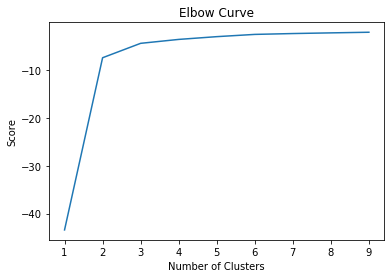

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

La curva es bastante rotunda. Utilizaremos 2 clusteres.

In [17]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.03823106 0.01616249 0.01754538 0.01682512 0.02636128 0.01662345
  0.02621723 0.01547105 0.01365601 0.18709306]
 [0.09195217 0.08570351 0.06927386 0.05419091 0.0697048  0.09933204
  0.06049343 0.07665374 0.03345184 0.6407563 ]]


Gracias a que sabemos la verdadera naturaleza de los tumores, podemos comprobar fácilmente la precisión del kmeans. Esto es muy conveniente porque, al ser 9 entradas, ninguna visualización nos va a dar una idea clara de como ha ido el modelo.

In [20]:
from sklearn.metrics import accuracy_score

labels = kmeans.predict(X)
accuracy_score(y, labels)

0.9692532942898975

Probamos a visualizar los resultado usando PCA

Text(0.5, 1.0, 'Kmeans clusters')

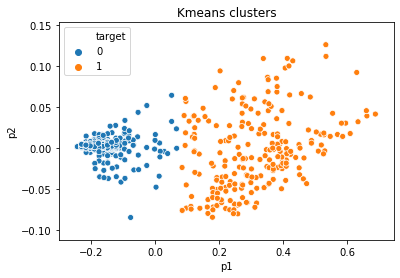

In [21]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components = 2)
pca.fit(X)
X_reduced_pca = pca.transform(X)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = labels
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("Kmeans clusters")

**PREGUNTA 3**: Aplica de nuevo el modelo anterior, pero usando una métrica distinta y compara los resultados.

**DBSCAN**: es un método de clustering no supervisado muy conocido. La métrica en la que se basa es la densidad de datos, es decir, calcula los grupos basándose en la densidad de datos que hay en las secciones del hiperplano. Si hay 2 grupos, buscará dos puntos con alta densidad y los considerará los centroides.

In [22]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.05, min_samples=10)
yhat = model.fit_predict(X)
fun=lambda x: 0 if x==0 else 1
vfun = np.vectorize(fun)
accuracy_score(y, vfun(yhat))


0.9633967789165446

Con los parámetros adecuados (eps para distancia mínima entre máxima entre miembros del mismo grupo y Min_samples para el mínimo por grupo).
Observamos una precisión muy buena, a la altura del kmeans y sin tener que indicar el numero de clusters. Esto es porque, para este caso  los puntos están bastante bien distribuidos, dejando pocos datos aislados lejos de los centroides, que es dosnde suele haber fallos en este algoritmo.

Text(0.5, 1.0, 'DBSACN clusters')

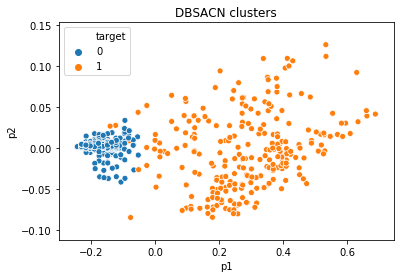

In [23]:
pca_data["target"] = vfun(yhat)
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("DBSACN clusters")

Quizás este plot pueda contrastar con lo dicho anteriormente, esto se debe a que los puntos entre los dos centroides son los que dan problemas a ambis métodos, mientras kmeans los clasifica todos como 0, DBSCAN lo hace como 1.

**Mini-Batch K-Means** este método es una modificación del método k-means que actualiza los centroides utilizando fragmentos pequeños del dataset en lugar del entero. Es una versión, que en casos con muchos datos mejora el rendimiento.

In [24]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=2)
model.fit(X)
y_pred = model.predict(X)
accuracy_score(y, y_pred)

0.03074670571010249

Text(0.5, 1.0, 'Mini-Batch K-Means')

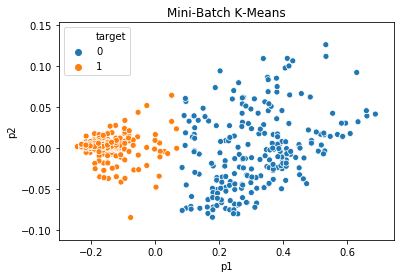

In [25]:
pca_data["target"] = y_pred
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("Mini-Batch K-Means")

Este método, si bien no aporta ninguna mejora respecto al kmeans, esta claro que es útil para datasets muy largos. Pues ha rendido igual.

**Gaussian Mixture Model**: Es un modelo que resume la funcion probabilística multivariable en distribuciones gaussianas. Aunque las mátemáticas detrás de este modelo exceden lo explicado en la asignatura, es sencillo implementarlo, solo hay que especificar el número de clusters.

In [26]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2)
model.fit(X)
yh = model.predict(X)
accuracy_score(y, yh)

0.8696925329428989

Text(0.5, 1.0, 'Mini-Batch K-Means')

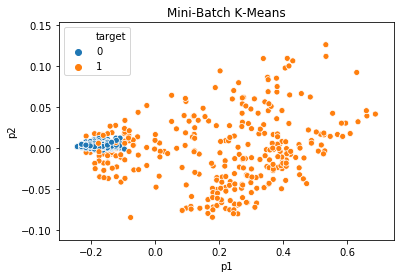

In [27]:
pca_data["target"] = yh
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("Mini-Batch K-Means")

El resultado es notablemente peor, esto puede ser debido a que los datos no siguen bien una distribución gaussiana.

**PREGUNTA 4:** Aplicar un modelo de árbol de decisión sobre el juego de datos sin haber aplicado previamente PCA/SVD.

Lo primero es separar el los datos para el entrenamiento de los de prueba. 80 por ciento para el entrenamiento para y 20 para el test.

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

Instanciamos y entrenamos el modelo con la librería se sklearn.

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3) 
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Examinamos su rendimiento.

In [34]:
from sklearn.metrics import accuracy_score
y_pred = dtc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9708029197080292

La librería sklearn proporciona un método para extraer todas la reglas que nuestro árbol ha tomado.

In [37]:
from sklearn.tree import export_text

cols=['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Suma']
r = export_text(dtc, feature_names=cols)
print(r)

|--- Suma <= 0.33
|   |--- Bare Nuclei <= 0.04
|   |   |--- class: 0
|   |--- Bare Nuclei >  0.04
|   |   |--- Clump Thickness <= 0.04
|   |   |   |--- class: 0
|   |   |--- Clump Thickness >  0.04
|   |   |   |--- class: 1
|--- Suma >  0.33
|   |--- Suma <= 0.52
|   |   |--- Single Epithelial Cell Size <= 0.08
|   |   |   |--- class: 1
|   |   |--- Single Epithelial Cell Size >  0.08
|   |   |   |--- class: 0
|   |--- Suma >  0.52
|   |   |--- Uniformity of Cell Size <= 0.06
|   |   |   |--- class: 1
|   |   |--- Uniformity of Cell Size >  0.06
|   |   |   |--- class: 1



Observamos que en las reglas que utiliza el árbol, la variable suma añadida en el anterior ejercicio es la que más se utiliza. Por ejemplo una de las reglas es: Si la suma es mayor que 0.33 y menor o igual que 0.52, con el tamaño de célula Single Epithelial mayor que 0.8, entonces el tumor es benigno.

**PREGUNTA 5**: Aplicar un modelo árbol de decisión sobre el juego de datos habiendo aplicado previamente PCA/SVD.

Repetimos el proceso anterior, esta vez los datos serán los dos componentes PCA extraidos en la práctica anterior.

In [46]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

In [47]:
dtc_pca = DecisionTreeClassifier(max_depth=3) 
dtc_pca.fit(X_train_pca,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Examinamos su rendimiento.

In [50]:
from sklearn.metrics import accuracy_score
y_pred_pca = dtc_pca.predict(X_test)
accuracy_score(y_test,y_pred_pca)

0.9781021897810219

Examinamos qué reglas ha generado nuestro modelo, vemos que todas se hacen a partir de las dís únicas variables resultantes del PCA.

In [49]:
from sklearn.tree import export_text

r = export_text(dtc_pca, feature_names=['p1','p2'])
print(r)

|--- p1 <= -0.00
|   |--- p2 <= -0.04
|   |   |--- p1 <= -0.09
|   |   |   |--- class: 1
|   |   |--- p1 >  -0.09
|   |   |   |--- class: 0
|   |--- p2 >  -0.04
|   |   |--- p1 <= -0.03
|   |   |   |--- class: 0
|   |   |--- p1 >  -0.03
|   |   |   |--- class: 0
|--- p1 >  -0.00
|   |--- p1 <= 0.19
|   |   |--- p2 <= 0.06
|   |   |   |--- class: 1
|   |   |--- p2 >  0.06
|   |   |   |--- class: 0
|   |--- p1 >  0.19
|   |   |--- p1 <= 0.26
|   |   |   |--- class: 1
|   |   |--- p1 >  0.26
|   |   |   |--- class: 1



**PREGUNTA 6**: ¿Ha habido mejora en capacidad predictiva, tras aplicar PCA/SVD? ¿A qué crees que es debido?.

El resultado ha mejorado, esto puede ser, debido a que los dos elementos extraidos usando PCA, aunque no recogen toda la información, al 100%, extraen características de los datos que son más determinantes que las que no recogen. 

El PCA es una técnica muy práctica para reducir la dimensionalidad de nuestro set de datos sin perder mucha información. En nuestro caso la mejora en precisión no es muy notoria, pero hay que recordar que el punto fuerte del PCA es que reduce la dimensionalidad de un problema, y por tanto, su complejidad, lo que se traduce en una mejora del rendimiento.

Considero que el PCA es una técnica esencial a tener en cuenta como Data Scientist sobretodo en problemas de clasificación. Es sencilla de implementar, si da mejores resultados o parecidos puedes usarla, pues mejora el rendimiento del modelo. Si empeora, puedes utilizar el PCA para la visualización de los resultados, como en apartados anteriores.

**BIBLIOGRAFÍA**:
* Dataset diabetes: https://archive.ics.uci.edu/ml/support/diabetes
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html
* https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
* https://www.youtube.com/watch?v=dQY8-7Q7ijM
* https://www.datacamp.com/community/tutorials/decision-tree-classification-python
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://stackoverflow.com/questions/41472015/knearest-neighbors-in-sklearn-valueerror-query-data-dimension-must-match-trai
* https://benalexkeen.com/k-nearest-neighbours-classification-in-python/
* https://www.kaggle.com/wyattferguson/knn-with-pca
* https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/
* https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
* https://www.kaggle.com/thebrownviking20/intro-to-keras-with-breast-cancer-data-ann
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
* https://stackoverflow.com/questions/35215161/most-efficient-way-to-map-function-over-numpy-array
* https://machinelearningmastery.com/clustering-algorithms-with-python/#:~:text=Cluster%20analysis%2C%20or%20clustering%2C%20is,or%20clusters%20in%20feature%20space.
* https://www.google.com/search?sxsrf=ALeKk03ipd-KIK_-sGh0mUQmWbo3kv02_A:1591197324587&q=python+change+euclidean+distance+kmeans&sa=X&ved=2ahUKEwjgl7L69-XpAhWlA2MBHSOjDRkQ7xYoAHoECAYQKg&biw=1920&bih=937
* https://www.osti.gov/biblio/421283

## 3 Rúbrica

    
* 15%. Se generan reglas y se comentan e interpretan las más significativas. Evaluar la calidad del modelo generado con los indicadores que se consideren adecuados.


* 15%. Se genera modelo no supervisado, se muestran y comentan medidas de calidad del modelo generado y se comentan las conclusiones así como la descripción de los grupos obtenidos.


* 20%. Se genera modelo no supervisado con métrica de distancia distinta al anterior. Se muestran y comentan medidas de calidad del modelo generado y se comentan las conclusiones así como la descripción de los grupos obtenidos. Adicionalmente se comparan los dos modelos no supervisados con métricas de distancia distinta.

* 15%. Se genera un modelo supervisado sin PCA/SVD previo, se muestran y comentan medidas de calidad del modelo generado y se comenta extensamente el conocimiento extraído del modelo.


* 15%. Se genera un modelo supervisado con PCA/SVD previo, se muestran y comentan medidas de calidad del modelo generado y se comenta extensamente el conocimiento extraído del modelo. Se valorará la extracción de conocimiento del modelo generado.


* 20%. Se compara la capacidad predictiva de los dos modelos supervisados y se comenta la diferencia de rendimiento en base al efecto PCA/SVD.